In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-placement-dataset/Job_Placement_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    return df

In [4]:
df = wrangle("/kaggle/input/job-placement-dataset/Job_Placement_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [5]:
corr = df.corr()
corr

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


In [6]:
#check for the null values
df.isnull().sum() / len(df)

gender                 0.0
ssc_percentage         0.0
ssc_board              0.0
hsc_percentage         0.0
hsc_board              0.0
hsc_subject            0.0
degree_percentage      0.0
undergrad_degree       0.0
work_experience        0.0
emp_test_percentage    0.0
specialisation         0.0
mba_percent            0.0
status                 0.0
dtype: float64

In [7]:
#Check for low and high cardanility features
df.nunique()

gender                   2
ssc_percentage         103
ssc_board                2
hsc_percentage          97
hsc_board                2
hsc_subject              3
degree_percentage       89
undergrad_degree         3
work_experience          2
emp_test_percentage    100
specialisation           2
mba_percent            205
status                   2
dtype: int64

In [8]:
for col in df.columns:
    print(col)

gender
ssc_percentage
ssc_board
hsc_percentage
hsc_board
hsc_subject
degree_percentage
undergrad_degree
work_experience
emp_test_percentage
specialisation
mba_percent
status


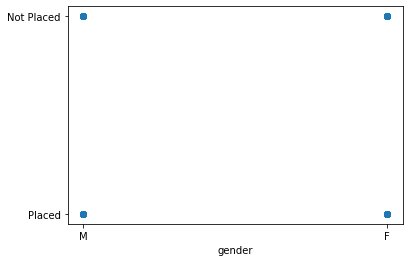

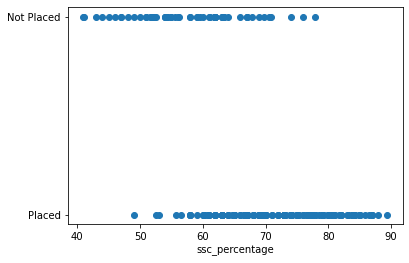

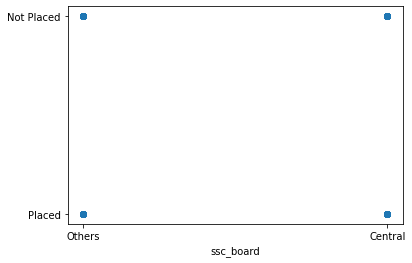

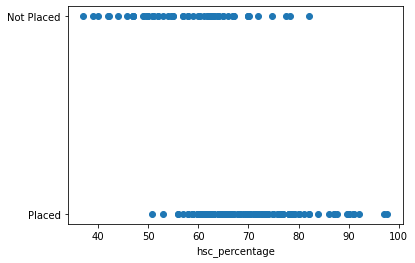

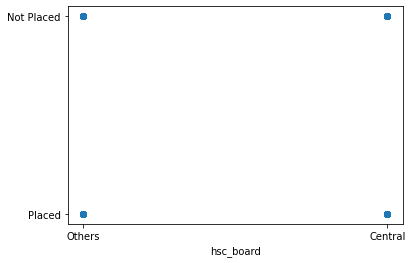

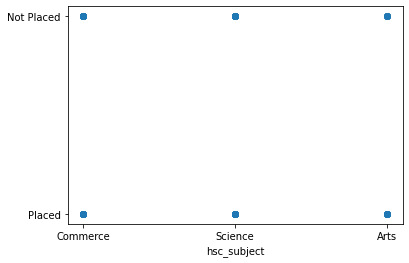

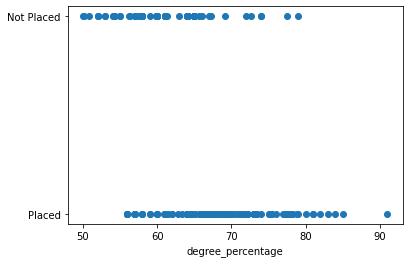

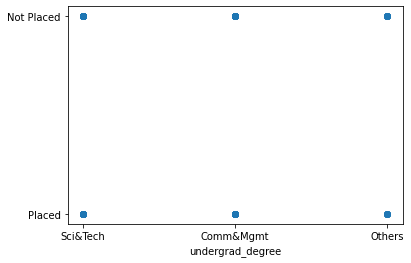

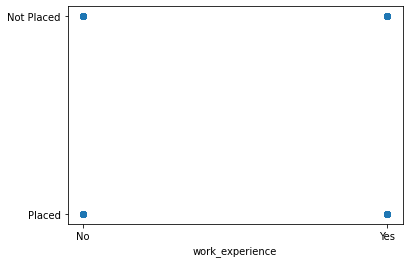

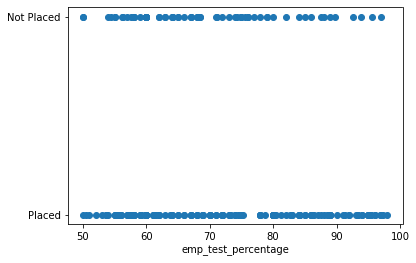

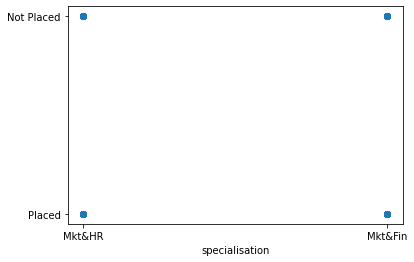

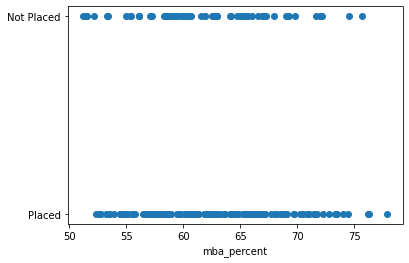

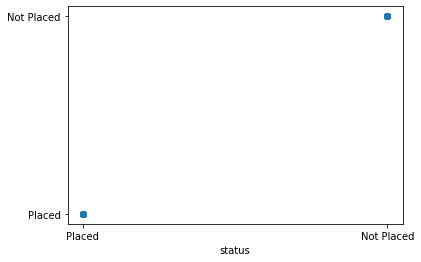

In [9]:
for col in df.columns:
    plt.scatter(x = df[col], y=df["status"])
    plt.xlabel(col)
    plt.show()

<AxesSubplot:xlabel='Status', ylabel='Relative Frequency'>

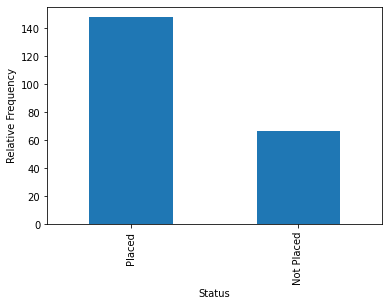

In [10]:
df["status"].value_counts().plot(
    kind="bar", xlabel="Status", ylabel="Relative Frequency"
)

<AxesSubplot:xlabel='status', ylabel='ssc_percentage'>

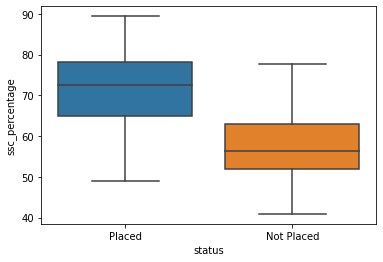

In [11]:
sns.boxplot(x = df["status"], y = df["ssc_percentage"])

<AxesSubplot:xlabel='ssc_board'>

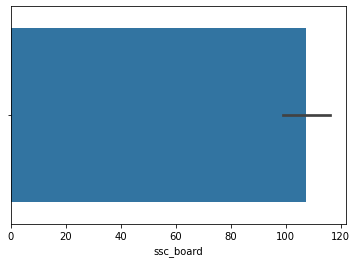

In [12]:
sns.barplot(x=df["ssc_board"].value_counts())

<AxesSubplot:xlabel='status', ylabel='ssc_board'>

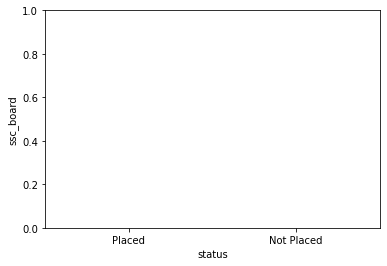

In [13]:
sns.boxplot(x = df["status"], y = df["ssc_board"].value_counts())